In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# first we do " pip install import-ipynb " 
import import_ipynb
import Class_TwoLayerNN

importing Jupyter notebook from Class_TwoLayerNN.ipynb


#### 1.The task

We draw 250 uniformly distributed
points in R^2 with norm  ≤ 1 and label them by yi = −1, and then another
250 uniformly distributed points x^i
in R2 with norm between 1 and 2 and label them
by yi = 1.

We use the neural network build in the class TwoLayerNN, with d1 = 2 imput neurons and d2 = 20 hidden layer neurons, to classify the data.

We train the model with the sgd method of the TwoLayerNN class and we use 3 different learning rates, S = 50000 iterations and minibatch size K = 20.

#### 2. Dataset and Labels

In [35]:
n= 250

#dataset
p = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(0, 1,n)) 
angle = np.pi*np.random.uniform(0, 2,n)     
p[:,0] = lenght*np.cos(angle)
p[:,1] = lenght*np.sin(angle)

q = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(1, 4,n))  
angle = np.pi*np.random.uniform(0, 2,n)
q[:,0] = lenght*np.cos(angle)
q[:,1] = lenght*np.sin(angle)

X = np.concatenate((p,q))

#labels
y_1 = - np.ones(p.shape[0])
y_2 = np.ones(q.shape[0])
y = np.concatenate((y_1,y_2))



#### 3. The neural network of interest

In [36]:
nn=Class_TwoLayerNN.TwoLayerNN(2,20)

#### 4. Training, accuracies and the contour line of the learned classifiers

learning rate  0.1
accuracy on train set : 0.9675
accuracy on test set : 0.91
--------------------------------------------------------------------------------------------------------
learning rate  0.30000000000000004
accuracy on train set : 0.9475
accuracy on test set : 0.92
--------------------------------------------------------------------------------------------------------
learning rate  0.5
accuracy on train set : 0.66
accuracy on test set : 0.63
--------------------------------------------------------------------------------------------------------


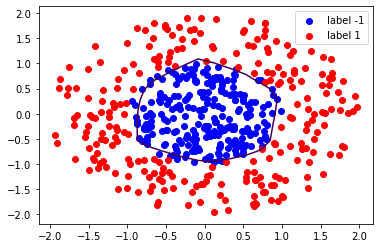

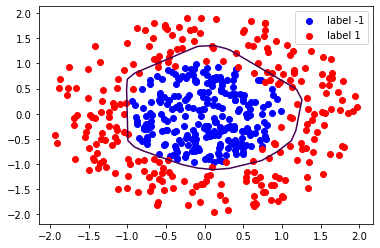

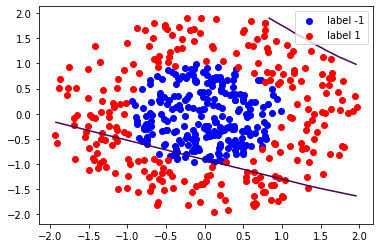

In [37]:
#train the neural network
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.metrics import accuracy_score

#learning rates
list_1=np.linspace(0.1,0.5,3)

for learning_rate in list_1 :
    
    print('learning rate ', learning_rate)
    
    nn.sgd(x_train,y_train,learning_rate,20,50000)      # K=20 the minibatch_size, S = 50000 the number of steps/iterations
    
    print('accuracy on train set :', accuracy_score(  y_train , np.where(nn.feedForward(x_train) >0,1,-1)  )   ) 
    print('accuracy on test set :', accuracy_score(  y_test , np.where(nn.feedForward(x_test) >0,1,-1)  )   )    
    
    plt.figure()
    
    #scatter plot of data
    plt.scatter(p[:,0],p[:,1],color='blue')
    plt.scatter(q[:,0],q[:,1],color='red')
    plt.legend(('label -1','label 1'))
    
    #contour line of learned classifier
    x_min = X[:,0].min()
    y_min = X[:,1].min()
    x_max = X[:,0].max()
    y_max = X[:,1].max()
    
    u = np.linspace(x_min,x_max, 20)
    v = np.linspace(y_min,y_max, 20)
    xx, yy = np.meshgrid(u,v) 
    xx_line = np.resize(xx,(20**2,1))
    yy_line = np.resize(yy,(20**2,1))         
    t = np.concatenate((xx_line,yy_line), axis = 1)
    z_pre=nn.feedForward(t)
    z_post = np.resize(z_pre,(20,20))  
    plt.contour(xx,yy,z_post, levels = [0])
    
    
    print('--------------------------------------------------------------------------------------------------------')